Preguntas de investigación: 
- ¿Cuántos años se demora un profesor en ser director?
- ¿Es un profesor parte del equipo directivo antes de compenzar como director?
- ¿Tiene postítulos adicionales un director?
- ¿Cuánto está en un mismo EE un profesor antes de volverse director?¿o se cambia partiendo de director
- ¿Cuantos años de docencia tiene un director iniciando?¿edad mínima?
- ¿Diferencias por género? ¿urbano rural?

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
path_data = r'C:\Users\JoaquinFarina\OneDrive - Teachers College, Columbia University\Desktop\TESIS\MINEDUC'

In [4]:
cols_doc = ['ï»¿AGNO','RBD','MRUN','DOC_FEC_NAC','DOC_GENERO','HORAS_CONTRATO','ID_IFP','ANO_SERVICIO_SISTEMA',
           'COD_DEPE','RURAL_RBD','TIT_ID_1','TIP_TIT_ID_1','SECTOR1']
cols_doc2 = ['AGNO','RBD','MRUN','DOC_FEC_NAC','DOC_GENERO','HORAS_CONTRATO','ID_IFP','ANO_SERVICIO_SISTEMA',
            'COD_DEPE','RURAL_RBD','TIT_ID_1','TIP_TIT_ID_1','SECTOR1']

In [30]:
#1: docente de aula
#
#3: planta directiva
#10: directiva
#15: subdirector
# 7 y 8 quedan fuera pues comienzan sólo de 2011
#7: jefe UTP
#8: inspector general
#
#4: director
#16: profesor encargado de EE

# WIDE format

In [337]:
for a in range(3,23):
    print(a)
    if a not in [16,17]:
        data = pd.read_csv(path_data + r'\DOC_{}.csv'.format(a),sep=';',encoding='latin1', low_memory=False,
                          usecols=cols_doc)
        data = data.rename(columns = {'ï»¿AGNO':'AGNO'})
    else:
        data = pd.read_csv(path_data + r'\DOC_{}.csv'.format(a),sep=';',encoding='latin1', low_memory=False,
                          usecols=cols_doc2)
        
        
        
    data.loc[:,'docente_aula'] = (data.ID_IFP == 1).astype(int)
    data.loc[:,'director'] = (data.ID_IFP.isin([4])).astype(int) # ,16
    data.loc[:,'otro'] = (~data.ID_IFP.isin([1,4])).astype(int) # ,16
    data.loc[:,'FUNCION_AGRUPADA'] = data.docente_aula + 2*data.director + 3*data.otro    
    
    data.loc[:,'AGNO'] = 1 
    
    data = data.sort_values(by = ['HORAS_CONTRATO'], ascending = False)
    data = data.drop_duplicates(subset=['MRUN'], keep='first')
    
    data.columns = [x + '_{}'.format(a) for x in data.columns]
    data = data.rename(columns = {'MRUN_{}'.format(a) :'MRUN'})
        
    if a ==3:
        data_merged = data.copy()
    else:
        data_merged = pd.merge(data_merged, data, on = ['MRUN'], how = 'outer', validate='one_to_one')
    


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [345]:
data_merged_young = data_merged[(data_merged.DOC_FEC_NAC_3 >= 19730000)|(data_merged.DOC_FEC_NAC_4 >= 19740000)|(data_merged.DOC_FEC_NAC_5 >= 19750000)]

In [382]:
val_list_docente = []
val_list_director = []
val_lider_escolar = []

for a in range(3,23):
    val1 = 100*len(data_merged_young[data_merged_young['docente_aula_{}'.format(a)] == 1])/len(data_merged_young)
    val2 = 100*len(data_merged_young[data_merged_young['director_{}'.format(a)] == 1])/len(data_merged_young)
    val3 = 100*len(data_merged_young[data_merged_young['otro_{}'.format(a)] == 1])/len(data_merged_young)

    val_list_docente +=[val1]
    val_list_director +=[val2]
    val_lider_escolar+=[val3]

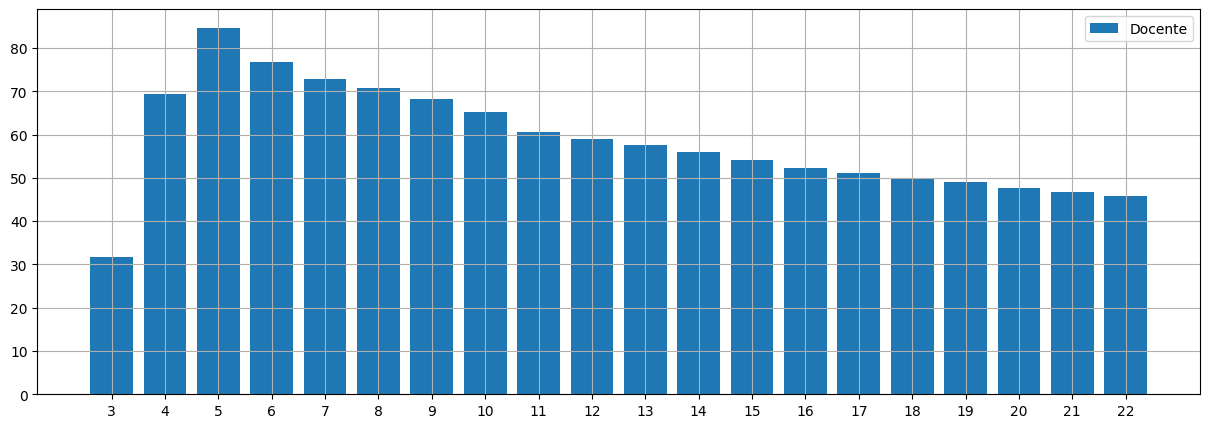

In [383]:
fig, ax = plt.subplots(figsize = (15,5))

ax.bar(range(3,23), val_list_docente, label ='Docente')

ax.set_xticks(range(3,23))
plt.legend()
plt.grid()
plt.show()

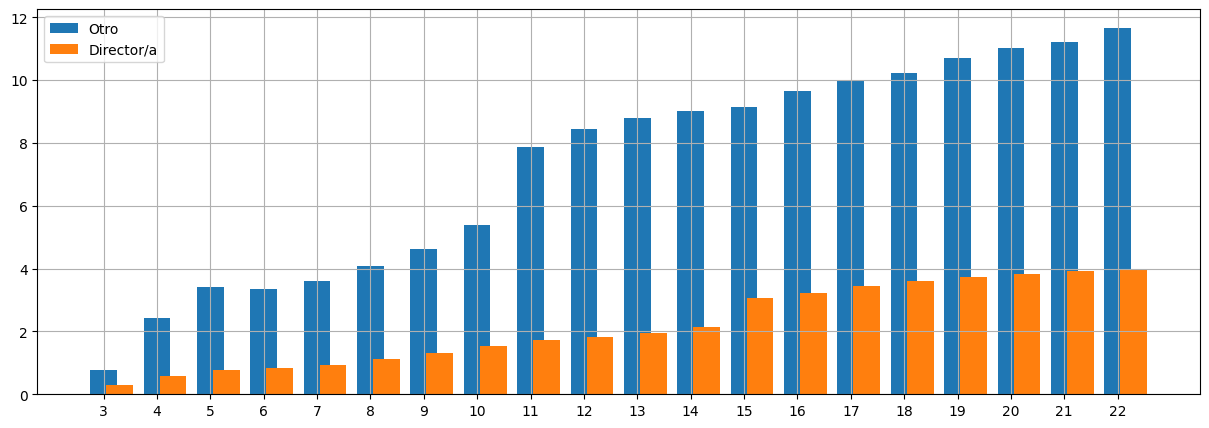

In [384]:
fig, ax = plt.subplots(figsize = (15,5))

#ax.bar(range(3,23), val_list_docente)

ax.bar(range(3,23), val_lider_escolar, label = 'Otro', width = 0.5)

ax.bar([x + 0.3 for x in range(3,23)], val_list_director ,label = 'Director/a', width = 0.5)

ax.set_xticks(range(3,23))
plt.legend()
plt.grid()
plt.show()

In [419]:
i = 1
# generar agnos de director
for agno in range(3,23):
    print(agno)
    data_merged.loc[:,'agnos_director_{}'.format(agno)] = 0
    for ind, row in data_merged.iterrows():
        for a in range(3,agno+1):
            if row['director_{}'.format(a)] == 1:
                data_merged.loc[ind,'agnos_director_{}'.format(agno)] +=1

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


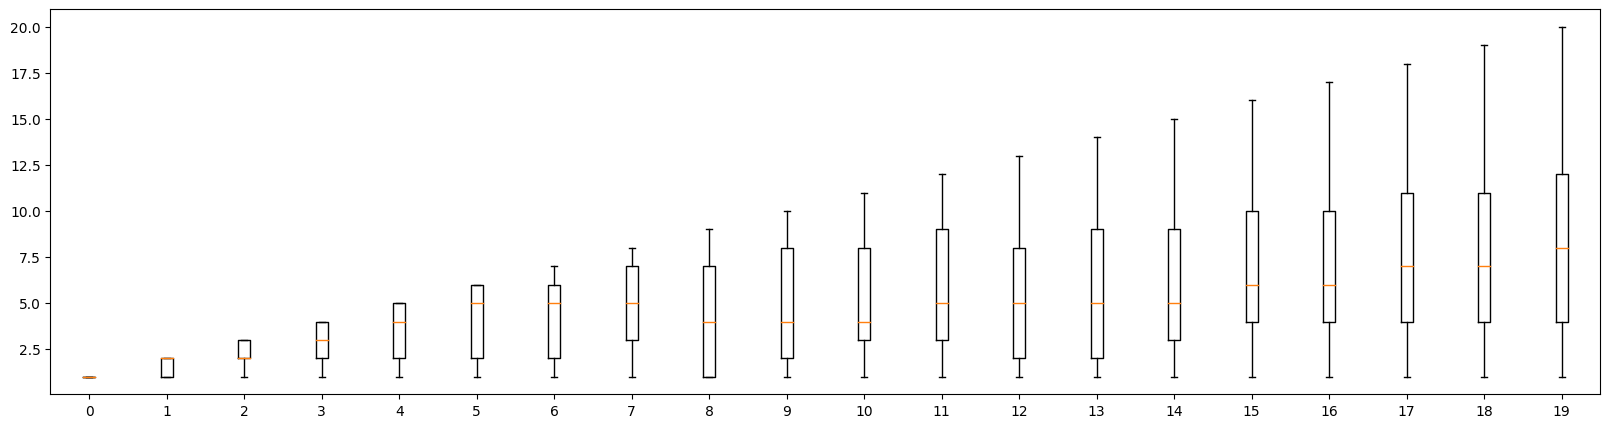

In [429]:
i=0
fig, ax = plt.subplots(figsize=(20,5))
for a in range(3,23):
    print(a)
    data = data_merged[(data_merged['AGNO_{}'.format(a)] == 1) & 
                       (data_merged['director_{}'.format(a)] == 1) & 
                      (data_merged['ANO_SERVICIO_SISTEMA_{}'.format(a)]>=5)]
    
    ax.boxplot(data['agnos_director_{}'.format(a)], positions= [i])
    i+=1
    #data.agno_nac.hist()
plt.show()

3
4
5
6
7
8
9
10
11


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

12
13
14
15
16
17
18
19


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

20
21
22


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_18164\2874245602.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

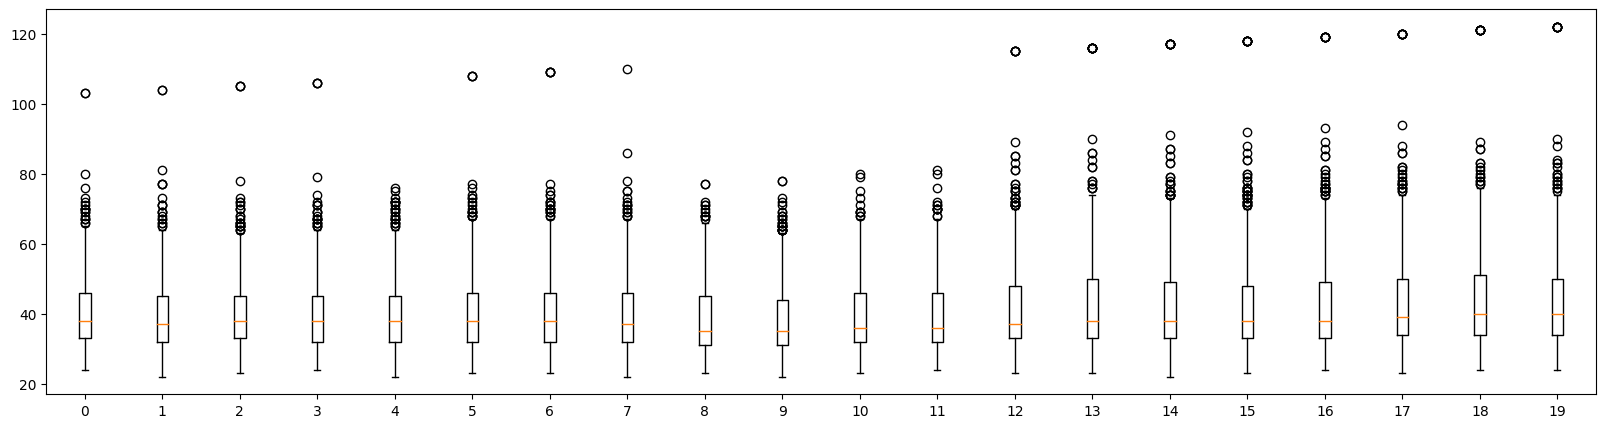

In [415]:
i=0
fig, ax = plt.subplots(figsize=(20,5))
for a in range(3,23):
    print(a)
    data = data_merged[(data_merged['AGNO_{}'.format(a)] == 1) & 
                       (data_merged['director_{}'.format(a)] == 1)&
                        (data_merged['ANO_SERVICIO_SISTEMA_{}'.format(a)] <=10)]
    
    if a <15:
        data['age'] = 2000 + a - np.round(data['DOC_FEC_NAC_{}'.format(a)]/10000,0)
    else:
        data['age'] = 2000 + a - np.round(data['DOC_FEC_NAC_{}'.format(a)]/100,0)
    
    ax.boxplot(data.age, positions= [i])
    i+=1
    #data.agno_nac.hist()
plt.show()

In [346]:
data_merged_young22 = data_merged_young[data_merged_young.director_22==1]

In [362]:
data_merged_young22.AGNO_22

677       1.0
876       1.0
1152      1.0
1180      1.0
2408      1.0
         ... 
191076    1.0
191311    1.0
191320    1.0
191355    1.0
191518    1.0
Name: AGNO_22, Length: 1266, dtype: float64

In [366]:
source_ej = []
target_ej = []
value_ej = []


def add_period_data(source_ej,target_ej,value_ej, t_0,t_f):


    n_0 = len(data_merged_young22[t_0].dropna().unique())
    n_f = len(data_merged_young22[t_f].dropna().unique())

    desfase_source = len(set(source_ej))
    print(desfase_source)
    desfase_target = len(set(source_ej + target_ej))
    print(desfase_target)

    for i in range(0,n_0+1):
        for j in range(0,n_f+1):
            source_ej += [desfase_source + i]
            target_ej+=[desfase_source + 1 + n_0 +j]
            
            if i == 0:
                if j != 0:
                    value_ej += [len(data_merged_young22[(data_merged_young22[t_0].isna()) & (data_merged_young22[t_f]==j)])]
                else:
                    value_ej += [len(data_merged_young22[(data_merged_young22[t_0].isna()) & (data_merged_young22[t_f].isna())])]
            
            else:
                if j!=0:
                    value_ej += [len(data_merged_young22[(data_merged_young22[t_0] == i) & (data_merged_young22[t_f]==j)])]
                else:
                    value_ej += [len(data_merged_young22[(data_merged_young22[t_0] == i) & (data_merged_young22[t_f].isna())])]
        
    return [source_ej,target_ej,value_ej]

count = 1
for a in range(3,22):
    [source_ej,target_ej,value_ej] = add_period_data(source_ej,target_ej,value_ej, 'FUNCION_AGRUPADA_{}'.format(a),
                                                     'FUNCION_AGRUPADA_{}'.format(a+1))
    count+=1
    
[source_ej,target_ej,value_ej] = add_period_data(source_ej,target_ej,value_ej, 'FUNCION_AGRUPADA_{}'.format(a+1),
                                                     'FUNCION_AGRUPADA_{}'.format(a+1))
count+=1

0
0
4
8
8
12
12
16
16
20
20
24
24
28
28
32
32
36
36
40
40
44
44
48
48
52
52
56
56
60
60
64
64
68
68
72
72
76
76
78


In [373]:
data_merged_young22.FUNCION_AGRUPADA_21.value_counts(dropna=False)

2.0    1119
3.0      93
1.0      36
NaN      18
Name: FUNCION_AGRUPADA_21, dtype: int64

In [375]:
source_ej += [76,77,78,79]
target_ej +=[80,80,80,80]
value_ej +=[1119,93, 36,18 ]

In [353]:
dict_1_6 = {0:'Missing', 1: 'Docente de aula',2: 'Planta Técnico-pedagógica',3: 'Planta Directiva',4: 
            'Director(a)',5: 'Otra en el establecimiento',6: 'Otra fuera del establecimiento'}
dict_1_3 = {0:'Unknown', 1: 'Teacher',2: 'Principal', 3:'Other'}


In [349]:
color_node = [
'#808B96', 
'#EC7063', '#F7DC6F', '#48C9B0']
color_link = [
'#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5']

In [376]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
    pad = 15,
    thickness = 20,
    line = dict(color = "black", width = 0.5),
    color = count*color_node,
    label = [""] * count  # This will remove labels
),
    link = dict(
        source = source_ej,
        target = target_ej,
        value =  value_ej,
        hovertemplate = 'Source: %{source}<br>Target: %{target}<br>Value: %{value}<extra></extra>', # customized hover template
    ))])

fig.update_layout(
    title_text="Detailed Sankey Diagram", 
    font_size=10,
    font_color="darkblue",
    title_font=dict(size=20, color='darkred'), 
    hovermode='x'
)



fig.update_xaxes(
    tickvals=list(range(2002, 2023)),  # this sets the xticks
    tickangle=45,  # this rotates the xticks labels for better visibility
    title_text='Year'
)

fig.show()



# LONG format

In [268]:
for a in range(3,23):
    print(a)

    if a not in [16,17]:
        data = pd.read_csv(path_data + r'\DOC_{}.csv'.format(a),sep=';',encoding='latin1', low_memory=False,
                          usecols=cols_doc)
        data = data.rename(columns = {'ï»¿AGNO':'AGNO'})
    else:
        data = pd.read_csv(path_data + r'\DOC_{}.csv'.format(a),sep=';',encoding='latin1', low_memory=False,
                          usecols=cols_doc2)

    data.loc[:,'docente_aula'] = (data.ID_IFP == 1).astype(int)
    data.loc[:,'director'] = (data.ID_IFP.isin([4])).astype(int) # ,16
    data.loc[:,'otro'] = (~data.ID_IFP.isin([1,4])).astype(int) # ,16
    data.loc[:,'FUNCION_AGRUPADA'] = data.docente_aula + 2*data.director + 3*data.otro    

    data = data.sort_values(by = ['HORAS_CONTRATO'], ascending = False)
    data = data.drop_duplicates(subset=['MRUN'], keep='first')
        
    if a ==3:
        data_merged_long = data.copy()
    else:
        data_merged_long = pd.concat([data_merged_long, data])
    
data_merged_long.loc[:,'AGNO_NAC'] = data_merged_long.DOC_FEC_NAC.apply(lambda x: int(str(x)[:4]))
data_merged_long.loc[data_merged_long.AGNO_NAC<=1920,'AGNO_NAC'] = np.nan
data_merged_long.loc[data_merged_long.AGNO==3300,'AGNO'] = np.nan
data_merged_long.loc[:,'EDAD'] = data_merged_long.AGNO - data_merged_long.AGNO_NAC
data_merged_long.loc[:,'FEMALE'] = (data_merged_long.DOC_GENERO ==2).astype(int)
data_merged_long.loc[data_merged_long.EDAD<20,'EDAD'] = 20
data_merged_long.loc[data_merged_long.EDAD>=95,'EDAD'] = 94
data_merged_long.loc[:,'TIP_TIT_ID_1'] =  data_merged_long.TIP_TIT_ID_1.replace(' ',0).astype(int)

# crear variable rango edad
bins = pd.IntervalIndex.from_tuples([(5*x,5*(x+1)) for x in range(4,19)])
data_merged_long.loc[:,'EDAD_cada5'] =  pd.cut(data_merged_long.EDAD, bins)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [269]:
data_merged_long = data_merged_long.sort_values(by = ['MRUN','AGNO'], ascending = True)
mrun_prof = data_merged_long.MRUN.unique()
data_agnos_servicio = data_merged_long[['MRUN','AGNO', 'ANO_SERVICIO_SISTEMA']]
# takes about 1 hour
N = len(data_agnos_servicio)
case_list = []
j = 0
print(N)
count = 0
        
from tqdm import tqdm

df_corregido_total_list = []

for m, group in tqdm(data_agnos_servicio.groupby('MRUN')):
    vals = group.ANO_SERVICIO_SISTEMA.values
    list_correctos = [i < j for i, j in zip(vals, vals[1:])]

    df_mrun = group.reset_index(drop=True)
    
    if not all(list_correctos):
        df_mrun.loc[1:, 'ANO_SERVICIO_SISTEMA'] = df_mrun.loc[0, 'ANO_SERVICIO_SISTEMA'] + np.arange(1, len(df_mrun))
        df_corregido_total_list.append(df_mrun)
    else:
        df_corregido_total_list.append(df_mrun)
                                       
df_corregido_total = pd.concat(df_corregido_total_list, ignore_index=True)

data_merged_long = data_merged_long.drop(columns = ['ANO_SERVICIO_SISTEMA'])
data_merged_long = pd.merge(data_merged_long, df_corregido_total, on = ['MRUN','AGNO'], how = 'left', validate='one_to_one')


4126818


100%|████████████████████████████████████████████████████████████████████████| 446243/446243 [01:30<00:00, 4928.51it/s]


In [181]:
data_merged_long.to_csv('panel_docente_long_anos_servicio_corregido.csv')

In [ ]:
# 1: Corporación Municipal
# 2: Municipal DAEM
# 3: Particular Subvencionado
# 4: Particular Pagado
# 5: Corporación de Administración Delegada (DL 3166)
# 6: Servicio Local de Educación

In [182]:
dict_titulo = {11: 'titulo_parvulo',
               12: 'titulo_diferencial',
               13: 'titulo_basica',
               14:'titulo_media'}

In [293]:
#data_merged_long = data_merged_long[[x for x in data_merged_long.columns if 'AGNO_PRIMER_DIRECTOR_' not in x]]

In [270]:
data_merged_long = data_merged_long.sort_values(by = ['MRUN','AGNO'], ascending =True)
mrun_directores = data_merged_long[data_merged_long.director == 1].MRUN.unique()
data_merged_long_directores = data_merged_long[data_merged_long.MRUN.isin(mrun_directores)]
case_list = []
agno_list = []

j= 0
for m in mrun_directores:
    if j%500 == 0:
        print(j/len(mrun_directores))
    j+=1
    
    vals = data_merged_long_directores[data_merged_long_directores.MRUN == m].director.values 
    case = (sum([vals[i]<= vals[i+1] for i in  range(len(vals)-1)]) == (len(vals)-1))
    case_list+=[case]

    agno0 = data_merged_long_directores[(data_merged_long_directores.MRUN == m)].AGNO.values[0] 

    agnoDIRE = data_merged_long_directores[(data_merged_long_directores.MRUN == m) & 
                                        (data_merged_long_directores.director == 1)].AGNO.values[0] 
    if agnoDIRE>agno0:
        agno_list += [agnoDIRE]
    else:
        agno_list += [9999] 

0.0
0.01753586083540841
0.03507172167081682
0.05260758250622523
0.07014344334163364
0.08767930417704205
0.10521516501245046
0.12275102584785887
0.14028688668326728
0.1578227475186757
0.1753586083540841
0.19289446918949252
0.2104303300249009
0.22796619086030934
0.24550205169571773
0.26303791253112613
0.28057377336653455
0.298109634201943
0.3156454950373514
0.3331813558727598
0.3507172167081682
0.3682530775435766
0.38578893837898504
0.40332479921439346
0.4208606600498018
0.43839652088521025
0.4559323817206187
0.4734682425560271
0.49100410339143546
0.5085399642268439
0.5260758250622523
0.5436116858976607
0.5611475467330691
0.5786834075684776
0.596219268403886
0.6137551292392943
0.6312909900747028
0.6488268509101112
0.6663627117455196
0.683898572580928
0.7014344334163364
0.7189702942517449
0.7365061550871532
0.7540420159225616
0.7715778767579701
0.7891137375933784
0.8066495984287869
0.8241854592641953
0.8417213200996037
0.8592571809350121
0.8767930417704205
0.8943289026058289
0.91186476344

In [294]:
df_primer_dire = pd.DataFrame([mrun_directores,agno_list]).T
df_primer_dire.columns = ['MRUN','AGNO_PRIMER_DIRECTOR']
data_merged_long = pd.merge(data_merged_long, df_primer_dire, on = 'MRUN', how = 'left', validate='many_to_one')

data_merged_long.loc[:,'PRIMER_DIRECTOR'] = (data_merged_long.AGNO == data_merged_long.AGNO_PRIMER_DIRECTOR).astype(int)
data_merged_long_shortened = data_merged_long[(data_merged_long.AGNO<=data_merged_long.AGNO_PRIMER_DIRECTOR)|
                                             (data_merged_long.AGNO_PRIMER_DIRECTOR.isna())]

df_last = data_merged_long_shortened[['MRUN','AGNO']].groupby(['MRUN'],as_index=False).max()
df_last = df_last.rename(columns = {'AGNO':'LAST_AGNO'})
data_merged_long_shortened = pd.merge(data_merged_long_shortened, df_last,
                                      on='MRUN', how = 'left', validate = 'many_to_one')

data_merged_long_shortened.loc[:,'RIGHT_CENSORED'] = 0
data_merged_long_shortened.loc[:,'RIGHT_CENSORED'] = ((data_merged_long_shortened.AGNO == data_merged_long_shortened.LAST_AGNO) & 
                                                      (data_merged_long_shortened.AGNO_PRIMER_DIRECTOR.isna())).astype(int)


## Life table

In [295]:
bins = pd.IntervalIndex.from_tuples([(5*x,5*(x+1)) for x in range(0,15)])
data_merged_long_shortened.loc[:,'SERVICIO_cada5'] =  pd.cut(data_merged_long_shortened.ANO_SERVICIO_SISTEMA, bins)

In [296]:
data_merged_long_shortened_eval = data_merged_long_shortened[data_merged_long_shortened.ANO_SERVICIO_SISTEMA<=60]
i = 0
vals = []
for a in data_merged_long_shortened_eval.SERVICIO_cada5.unique():
    data = data_merged_long_shortened_eval[data_merged_long_shortened_eval.SERVICIO_cada5 == a]
    
    data = data.drop_duplicates(subset = ['MRUN'], keep='last')    
    N = len(data)
    
    left = list(data[data.AGNO_PRIMER_DIRECTOR == 9999].MRUN.unique())
    data = data[~data.MRUN.isin(left)]
    
    right = list(data[(data.AGNO_PRIMER_DIRECTOR != 9999) &(data.RIGHT_CENSORED == 1)].MRUN.unique())
    data = data[~data.MRUN.isin(right)]

    become_director = list(data[data.director == 1].MRUN.unique())
    data = data[~data.MRUN.isin(become_director)]

    continuan = list(data[(data.director == 0) & (data.RIGHT_CENSORED == 0) & (data.AGNO_PRIMER_DIRECTOR != 9999)].MRUN.unique())
    data = data[~data.MRUN.isin(continuan)]

    val = [a,len(become_director), len(left) + len(right)]
    vals+=[val]
    print(val)
    
    data_merged_long_shortened_eval = data_merged_long_shortened_eval[~data_merged_long_shortened_eval.MRUN.isin(left+
                                                                                                 right+
                                                                                                 become_director)]

pd.DataFrame(vals).sort_values(by=0).to_excel('crosstab_pre_life_table_anos_servicio.xlsx')

[Interval(0.0, 5.0, closed='right'), 2143, 100467]
[Interval(5.0, 10.0, closed='right'), 3359, 75941]
[Interval(10.0, 15.0, closed='right'), 3198, 59160]
[Interval(15.0, 20.0, closed='right'), 2378, 36166]
[Interval(20.0, 25.0, closed='right'), 2357, 26531]
[nan, 0, 0]
[Interval(25.0, 30.0, closed='right'), 2258, 21439]
[Interval(30.0, 35.0, closed='right'), 2453, 26195]
[Interval(35.0, 40.0, closed='right'), 1703, 30938]
[Interval(40.0, 45.0, closed='right'), 744, 16086]
[Interval(45.0, 50.0, closed='right'), 169, 4206]
[Interval(50.0, 55.0, closed='right'), 36, 854]
[Interval(55.0, 60.0, closed='right'), 10, 223]


In [298]:
pd.crosstab(data_merged_long_shortened.DOC_GENERO, data_merged_long_shortened.COD_DEPE)

COD_DEPE,1,3,4
DOC_GENERO,,,
1,518336,459755,107482
2,1263352,1307002,318929


In [297]:
# subgroups 
dict_final = {}
data_merged_long_shortened.loc[:,'COD_DEPE'] = data_merged_long_shortened.COD_DEPE.replace({2:1,6:1,5:3})
for g in [1,2]:
    print(g)
    for depe in [1,3,4]:
        print(depe)
        data_merged_long_shortened_eval = data_merged_long_shortened[(data_merged_long_shortened.ANO_SERVICIO_SISTEMA<=60)&
                                                                    (data_merged_long_shortened.DOC_GENERO == g) &
                                                                    (data_merged_long_shortened.COD_DEPE == depe)]
        print(len(data_merged_long_shortened_eval))
        i = 0
        vals = []
        for a in data_merged_long_shortened_eval.SERVICIO_cada5.unique():
            data = data_merged_long_shortened_eval[data_merged_long_shortened_eval.SERVICIO_cada5 == a]

            data = data.drop_duplicates(subset = ['MRUN'], keep='last')    
            N = len(data)

            left = list(data[data.AGNO_PRIMER_DIRECTOR == 9999].MRUN.unique())
            data = data[~data.MRUN.isin(left)]

            right = list(data[(data.AGNO_PRIMER_DIRECTOR != 9999) &(data.RIGHT_CENSORED == 1)].MRUN.unique())
            data = data[~data.MRUN.isin(right)]

            become_director = list(data[data.director == 1].MRUN.unique())
            data = data[~data.MRUN.isin(become_director)]

            continuan = list(data[(data.director == 0) & (data.RIGHT_CENSORED == 0) & (data.AGNO_PRIMER_DIRECTOR != 9999)].MRUN.unique())
            data = data[~data.MRUN.isin(continuan)]

            val = [a,len(become_director), len(left) + len(right)]
            vals+=[val]
            print(val)

            data_merged_long_shortened_eval = data_merged_long_shortened_eval[~data_merged_long_shortened_eval.MRUN.isin(left+
                                                                                                         right+
                                                                                                         become_director)]

        dict_final['pre_life_anos_servicio_gen{}_depe{}'.format(g,depe)] = pd.DataFrame(vals).sort_values(by=0)
        

1
1
518318
[Interval(0.0, 5.0, closed='right'), 211, 11258]
[nan, 0, 0]
[Interval(5.0, 10.0, closed='right'), 434, 8692]
[Interval(10.0, 15.0, closed='right'), 472, 6415]
[Interval(15.0, 20.0, closed='right'), 431, 3980]
[Interval(20.0, 25.0, closed='right'), 547, 3223]
[Interval(25.0, 30.0, closed='right'), 639, 2952]
[Interval(30.0, 35.0, closed='right'), 840, 3750]
[Interval(35.0, 40.0, closed='right'), 640, 4554]
[Interval(40.0, 45.0, closed='right'), 335, 5212]
[Interval(45.0, 50.0, closed='right'), 56, 1556]
[Interval(50.0, 55.0, closed='right'), 2, 71]
[Interval(55.0, 60.0, closed='right'), 0, 7]
3
459639
[Interval(0.0, 5.0, closed='right'), 368, 17102]
[Interval(5.0, 10.0, closed='right'), 549, 9679]
[Interval(10.0, 15.0, closed='right'), 518, 6377]
[nan, 0, 0]
[Interval(15.0, 20.0, closed='right'), 377, 3901]
[Interval(20.0, 25.0, closed='right'), 354, 2736]
[Interval(25.0, 30.0, closed='right'), 285, 1923]
[Interval(30.0, 35.0, closed='right'), 246, 1793]
[Interval(35.0, 40.0

In [300]:
# create a excel writer object
with pd.ExcelWriter("pre_life_tables_gender_cod_depe.xlsx") as writer:
   
    for key in dict_final.keys():
        print(key)
        dict_final[key].to_excel(writer, sheet_name=key[10:], index=False)

pre_life_anos_servicio_gen1_depe1
pre_life_anos_servicio_gen1_depe3
pre_life_anos_servicio_gen1_depe4
pre_life_anos_servicio_gen2_depe1
pre_life_anos_servicio_gen2_depe3
pre_life_anos_servicio_gen2_depe4


In [314]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

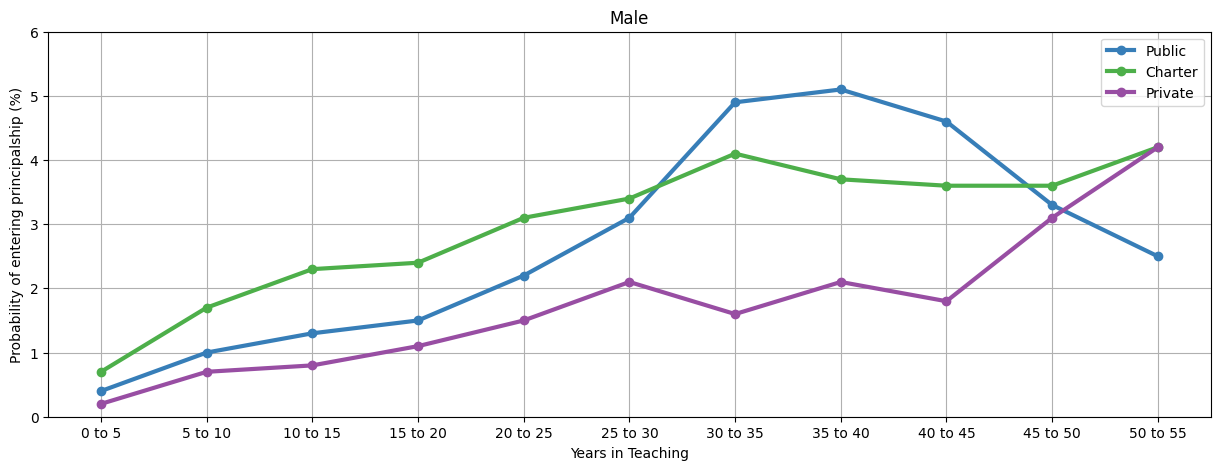

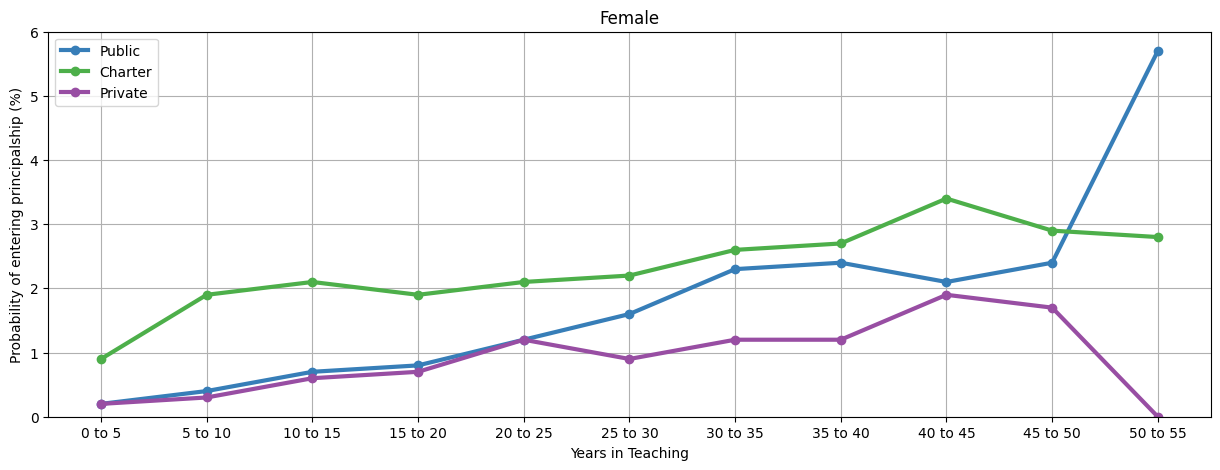

In [333]:
male_public = [0.004,0.010,0.013,0.015,0.022,0.031,0.049,0.051,0.046,0.033,0.025,0.000]
male_charter = [0.007,0.017,0.023,0.024,0.031,0.034,0.041,0.037,0.036,0.036,0.042,0.052]
male_private = [0.002,0.007,0.008,0.011,0.015,0.021,0.016,0.021,0.018,0.031,0.042,0.000]

female_public = [0.002,0.004,0.007,0.008,0.012,0.016,0.023,0.024,0.021,0.024,0.057,0.000]
female_charter = [0.009,0.019,0.021,0.019,0.021,0.022,0.026,0.027,0.034,0.029,0.028,0.055]
female_private = [0.002,0.003,0.006,0.007,0.012,0.009,0.012,0.012,0.019,0.017,0.000,0.000]

# MALE
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(range(1, 12), [100*x for x in male_public[:-1]] , label = 'Public' ,linewidth = 3, marker='o', color = CB_color_cycle[0] )
ax.plot(range(1, 12), [100*x for x in male_charter[:-1]] ,label = 'Charter',linewidth = 3, marker='o', color = CB_color_cycle[2] )
ax.plot(range(1, 12), [100*x for x in male_private[:-1]] ,label = 'Private',linewidth = 3, marker='o', color = CB_color_cycle[5] )
plt.grid(True)
plt.legend()
plt.xticks(range(1,12),['0 to 5','5 to 10','10 to 15','15 to 20','20 to 25','25 to 30','30 to 35',
                        '35 to 40','40 to 45','45 to 50','50 to 55'])
plt.xlabel('Years in Teaching')
plt.ylabel('Probability of entering principalship (%)')
plt.title('Male')
plt.ylim([0,6])
plt.savefig('male_hazard.svg')
plt.show()

# FEMALE
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(range(1, 12), [100*x for x in female_public[:-1]] , label = 'Public' ,linewidth = 3, marker='o', color = CB_color_cycle[0] )
ax.plot(range(1, 12), [100*x for x in female_charter[:-1]] ,label = 'Charter',linewidth = 3, marker='o', color = CB_color_cycle[2] )
ax.plot(range(1, 12), [100*x for x in female_private[:-1]] ,label = 'Private',linewidth = 3, marker='o', color = CB_color_cycle[5] )
plt.grid(True)
plt.legend()
plt.xticks(range(1,12),['0 to 5','5 to 10','10 to 15','15 to 20','20 to 25','25 to 30','30 to 35',
                        '35 to 40','40 to 45','45 to 50','50 to 55'])
plt.xlabel('Years in Teaching')
plt.ylabel('Probability of entering principalship (%)')
plt.title('Female')
plt.ylim([0,6])
plt.savefig('female_hazard.svg')
plt.show()

## CORR age vs principal

In [339]:
df_directores.columns

Index(['AGNO', 'RBD', 'COD_DEPE', 'RURAL_RBD', 'MRUN', 'DOC_GENERO',
       'DOC_FEC_NAC', 'TIT_ID_1', 'TIP_TIT_ID_1', 'ID_IFP', 'HORAS_CONTRATO',
       'SECTOR1', 'docente_aula', 'director', 'otro', 'FUNCION_AGRUPADA',
       'AGNO_NAC', 'EDAD', 'FEMALE', 'EDAD_cada5', 'ANO_SERVICIO_SISTEMA',
       'PRIMER_DIRECTOR', 'AGNO_PRIMER_DIRECTOR'],
      dtype='object')

In [378]:
df_directores = data_merged_long[data_merged_long.director == 1]
df_directores = df_directores.dropna(subset=['EDAD_cada5','AGNO'])
df_directores = df_directores.rename(columns = {'EDAD_cada5': 'Age', 'AGNO':'Year'})
df_directores.loc[:,'Year'] = df_directores.Year.astype(int)
#df_directores.loc[:,'EDAD'] = df_directores.EDAD.astype(int)

df_cross = np.round(100*pd.crosstab( df_directores.Age, df_directores.Year, normalize='columns'),1).T

df_cross = df_cross.style.background_gradient(cmap='Blues', axis=None).format("{:.1f}")
print(df_cross)
df_cross.to_excel('output.xlsx', engine='openpyxl')


# Model

In [399]:
data_model = data_merged_long_shortened[data_merged_long_shortened.AGNO_PRIMER_DIRECTOR !=9999][['MRUN', 'HORAS_CONTRATO', 'ANO_SERVICIO_SISTEMA', 'director', 'FEMALE', 'TIP_TIT_ID_1', 'EDAD','RURAL_RBD', 'COD_DEPE']].sort_values(by=['MRUN']).dropna()
data_model = data_model[data_model.ANO_SERVICIO_SISTEMA<=60]
data_model.loc[:,'COD_DEPE'] = data_model.COD_DEPE.replace({2:1,6:1,5:3})

for x in [[5*x, 5*(x+1)] for x in range(12)]:
    print(x)
    data_model.loc[:,'EXPERIENCE_{}_{}'.format(x[0],x[1])] = (data_model.ANO_SERVICIO_SISTEMA.isin(range(x[0],x[1]))).astype(int)
    
for x in range(11,15):
    print(x)
    data_model.loc[:,'DEGREE_{}'.format(dict_titulo[x])] = (data_model.TIP_TIT_ID_1 == x).astype(int)
    
for x in [1,3,4]:
    print(x)
    data_model.loc[:,'ADMIN_{}'.format(x)] = (data_model.COD_DEPE == x).astype(int)

[0, 5]
[5, 10]
[10, 15]
[15, 20]
[20, 25]
[25, 30]
[30, 35]
[35, 40]
[40, 45]
[45, 50]
[50, 55]
[55, 60]
11
12
13
14
1
3
4


In [400]:
X = data_model[[x for x in data_model.columns if ('EXPERIENCE_' in x) & ('_0_5' not in x)] + 
               [x for x in data_model.columns if ('DEGREE_' in x)]  + 
               [x for x in data_model.columns if ('ADMIN_' in x) & ('_1' not in x)]  + 
               ['HORAS_CONTRATO','FEMALE', 'RURAL_RBD', 'EDAD']]

X = sm.add_constant(X)

y = data_model.director

model = sm.Logit(y, X)

result = model.fit()
    
data_model.loc[:,'probs'] = result.predict(X)
result.summary()

Optimization terminated successfully.
         Current function value: 0.029407
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               director   No. Observations:              3884192
Model:                          Logit   Df Residuals:                  3884170
Method:                           MLE   Df Model:                           21
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.1178
Time:                        16:07:16   Log-Likelihood:            -1.1422e+05
converged:                       True   LL-Null:                   -1.2948e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -15.8342      0.104   -152.559      0.000     -16.038     -15.631
EXPERIENCE_5_10               0.5905      0.032     18.589      0.000       0.528       0.653
EXPERIENCE_10_15              0.7391      0.034     22.060      0.000       0.673       0.805
EXPERIENCE_15_20              0.7787      0.037     20.951      0.000       0.706       0.852
EXPERIENCE_20_25              0.8419      0.040     20.976      0.000       0.763       0.921
EXPERIENCE_25_30              0.8684      0.043     20.298      0.000       0.785       0.952
EXPERIENCE_30_35              0.9584      0.045     21.248      0.000       0.870       1.047
EXPERIENCE_35_40              0.9436      0.049     19.119      0.000       0.847       1.040
EXPERIENCE_40_45              0.9635      0.057     16.789      0.000       0.851       1.076
EXPERIENCE_45_50              0.8837      0.083     10.625      0.000       0.721       1.047
EXPERIENCE_50_55              0.6563      0.168      3.895      0.000       0.326       0.986
EXPERIENCE_55_60              0.5417      0.288      1.879      0.060      -0.023       1.107
DEGREE_titulo_parvulo         0.9666      0.043     22.608      0.000       0.883       1.050
DEGREE_titulo_diferencial     0.9659      0.040     24.188      0.000       0.888       1.044
DEGREE_titulo_basica          0.7627      0.036     21.223      0.000       0.692       0.833
DEGREE_titulo_media           0.3812      0.037     10.394      0.000       0.309       0.453
ADMIN_3                       0.4907      0.015     31.711      0.000       0.460       0.521
ADMIN_4                      -0.4226      0.034    -12.348      0.000      -0.490      -0.356
HORAS_CONTRATO                0.2068      0.002    102.102      0.000       0.203       0.211
FEMALE                       -0.5242      0.016    -32.815      0.000      -0.555      -0.493
RURAL_RBD                     0.7884      0.018     43.126      0.000       0.753       0.824
EDAD                          0.0219      0.001     18.312      0.000       0.020       0.024
=============================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [402]:
# Get the coefficients, standard errors, odds ratios and pvalues
coefficients = result.params
standard_errors = result.bse
odds_ratios = np.exp(result.params)
pvalues = result.pvalues

# Get model diagnostics
deviance = -2 * result.llf
aic = result.aic
bic = result.bic

# Combine the results into a DataFrame
results_df = pd.DataFrame({
    'Coefficient': coefficients,
    'SE': standard_errors,
    'Odds Ratio': odds_ratios,
    'Pvalue': pvalues
})

# Assign significance levels
significance = pd.cut(results_df.Pvalue,
                      bins=[0, 0.001, 0.01, 0.05, 1],
                      labels=['***', '**', '*', ' '], include_lowest =True)
results_df['Significance'] = significance

# Drop the Pvalue column
results_df = results_df.drop(columns='Pvalue')

# Add model diagnostics to the table
diagnostics = pd.DataFrame({
    'Coefficient': [np.nan, np.nan, np.nan, np.nan],
    'SE': [np.nan, np.nan, np.nan, np.nan],
    'Odds Ratio': [np.nan, np.nan, np.nan, np.nan],
    'Significance': [' ', ' ', ' ', ' ']
}, index=['Deviance', 'Goodness of fit', 'AIC', 'BIC'])

diagnostics.loc['Deviance', 'Coefficient'] = deviance
diagnostics.loc['Goodness of fit', 'Coefficient'] = result.llnull - result.llf
diagnostics.loc['AIC', 'Coefficient'] = aic
diagnostics.loc['BIC', 'Coefficient'] = bic

results_df = results_df.append(diagnostics)

print(np.round(results_df,3))

np.round(results_df,3).to_excel('DTHM_results.xlsx')


                           Coefficient     SE  Odds Ratio Significance
const                          -15.834  0.104       0.000          ***
EXPERIENCE_5_10                  0.591  0.032       1.805          ***
EXPERIENCE_10_15                 0.739  0.034       2.094          ***
EXPERIENCE_15_20                 0.779  0.037       2.179          ***
EXPERIENCE_20_25                 0.842  0.040       2.321          ***
EXPERIENCE_25_30                 0.868  0.043       2.383          ***
EXPERIENCE_30_35                 0.958  0.045       2.608          ***
EXPERIENCE_35_40                 0.944  0.049       2.569          ***
EXPERIENCE_40_45                 0.964  0.057       2.621          ***
EXPERIENCE_45_50                 0.884  0.083       2.420          ***
EXPERIENCE_50_55                 0.656  0.168       1.928          ***
EXPERIENCE_55_60                 0.542  0.288       1.719             
DEGREE_titulo_parvulo            0.967  0.043       2.629          ***
DEGREE

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23432\2287468313.py:42: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Descriptive table 

In [401]:
selected_columns = ['director'] + [x for x in data_model.columns if ('EXPERIENCE_' in x) ] + \
                   [x for x in data_model.columns if 'DEGREE_' in x] + \
                   [x for x in data_model.columns if ('ADMIN_' in x) ] + \
                   ['HORAS_CONTRATO', 'FEMALE', 'RURAL_RBD', 'EDAD']


In [403]:
data_merged_long_shortened.loc[:,'COD_DEPE'] = data_merged_long_shortened.COD_DEPE.replace({2:1,6:1,5:3})

for x in [[5*x, 5*(x+1)] for x in range(12)]:
    print(x)
    data_merged_long_shortened.loc[:,'EXPERIENCE_{}_{}'.format(x[0],x[1])] = (data_merged_long_shortened.ANO_SERVICIO_SISTEMA.isin(range(x[0],x[1]))).astype(int)
    
for x in range(11,15):
    print(x)
    data_merged_long_shortened.loc[:,'DEGREE_{}'.format(dict_titulo[x])] = (data_merged_long_shortened.TIP_TIT_ID_1 == x).astype(int)
    
for x in [1,3,4]:
    print(x)
    data_merged_long_shortened.loc[:,'ADMIN_{}'.format(x)] = (data_merged_long_shortened.COD_DEPE == x).astype(int)

[0, 5]
[5, 10]
[10, 15]
[15, 20]
[20, 25]
[25, 30]
[30, 35]
[35, 40]
[40, 45]
[45, 50]
[50, 55]
[55, 60]
11
12
13
14
1
3
4


In [404]:
data_model.COD_DEPE.value_counts()

1    1734787
3    1728639
4     420766
Name: COD_DEPE, dtype: int64

In [405]:
data_merged_long_shortened.COD_DEPE.value_counts()

1    1781688
3    1766757
4     426411
Name: COD_DEPE, dtype: int64

In [406]:
descriptive_table_data_model = data_model[data_model.director==1][selected_columns].describe().loc[['mean', 'std', 'min', 'max']].transpose()

descriptive_table_data_model2 = data_merged_long_shortened[selected_columns].describe().loc[['mean', 'std', 'min', 'max']].transpose()

# Append the two descriptive tables
combined_descriptive_table =pd.concat([descriptive_table_data_model2, descriptive_table_data_model], axis=1)

# Export to Excel
combined_descriptive_table.to_excel('combined_descriptive_table.xlsx')

# Format the Excel file for paper printing
excel_writer = pd.ExcelWriter('combined_descriptive_table.xlsx', engine='xlsxwriter')
combined_descriptive_table.to_excel(excel_writer, sheet_name='Sheet1')
worksheet = excel_writer.sheets['Sheet1']

# Set column widths
worksheet.set_column(0, len(combined_descriptive_table.columns) - 1, 20)

# Apply cell formatting
format_bold = excel_writer.book.add_format({'bold': True})
worksheet.set_row(0, None, format_bold)

excel_writer.save()

0
1


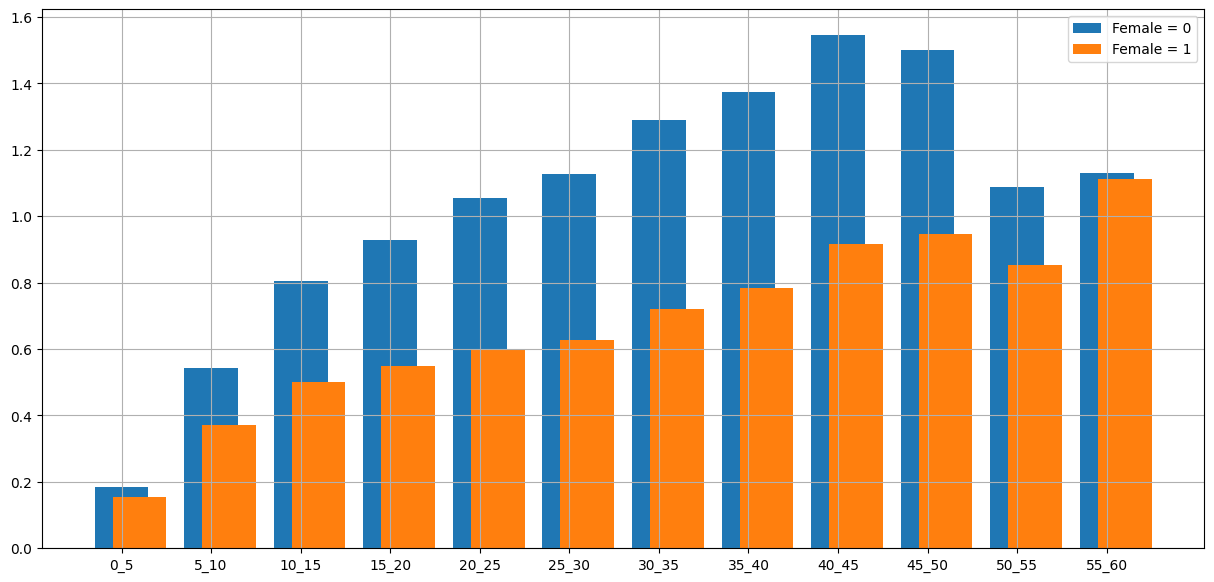

In [257]:
exp_cols = ['EXPERIENCE_0_5', 'EXPERIENCE_5_10', 'EXPERIENCE_10_15',
       'EXPERIENCE_15_20', 'EXPERIENCE_20_25', 'EXPERIENCE_25_30',
       'EXPERIENCE_30_35', 'EXPERIENCE_35_40', 'EXPERIENCE_40_45',
       'EXPERIENCE_45_50', 'EXPERIENCE_50_55', 'EXPERIENCE_55_60']

fig, ax = plt.subplots(figsize=(15,7))
for s in [0,1]:
    print(s)
    data = data_model[data_model.FEMALE==s]
    val_list = []
    for x in exp_cols:
        val_list += [data[data[x] == 1].probs.mean()]    
    
    
    plt.bar([x + s/5 for x in range(1,13)],[100*x for x in val_list], width=0.6, label='Female = ' + str(s))

plt.legend()
plt.grid(True)
plt.xticks(range(1,13),[str(x)[11:] for x in exp_cols])
plt.show()

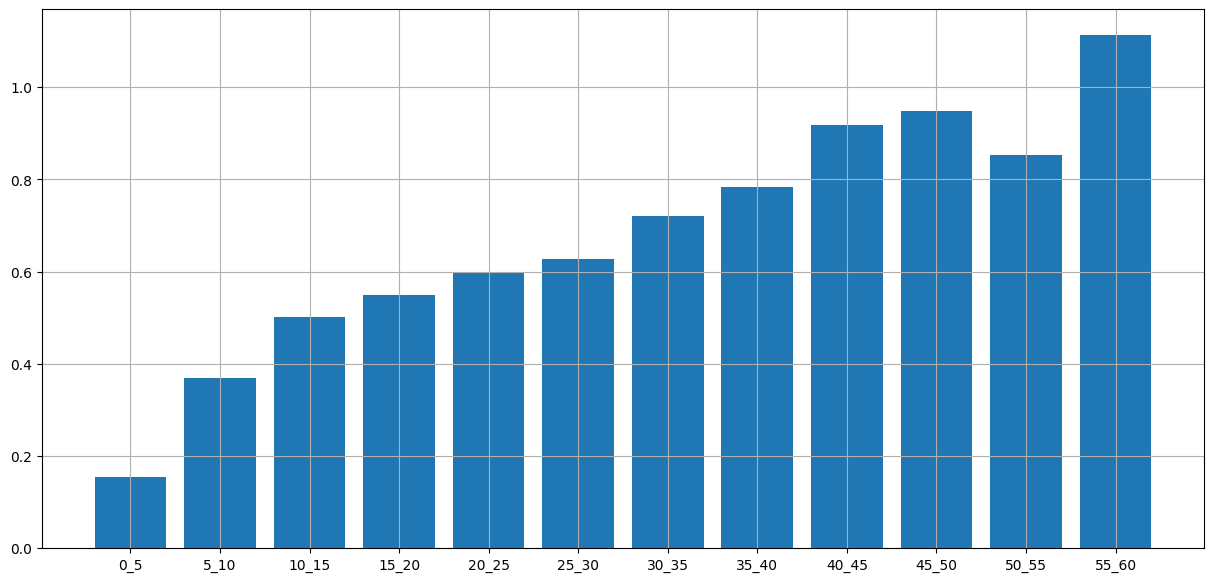

In [262]:
fig, ax = plt.subplots(figsize=(15,7))
val_list = []
for x in exp_cols:
        val_list += [100*data[data[x] == 1].probs.mean()]    
        
plt.bar(range(1,13),val_list)
plt.grid(True)
plt.xticks(range(1,13),[str(x)[11:] for x in data_model.columns if ('EXPERIENCE_' in x)])
plt.show()

0
1


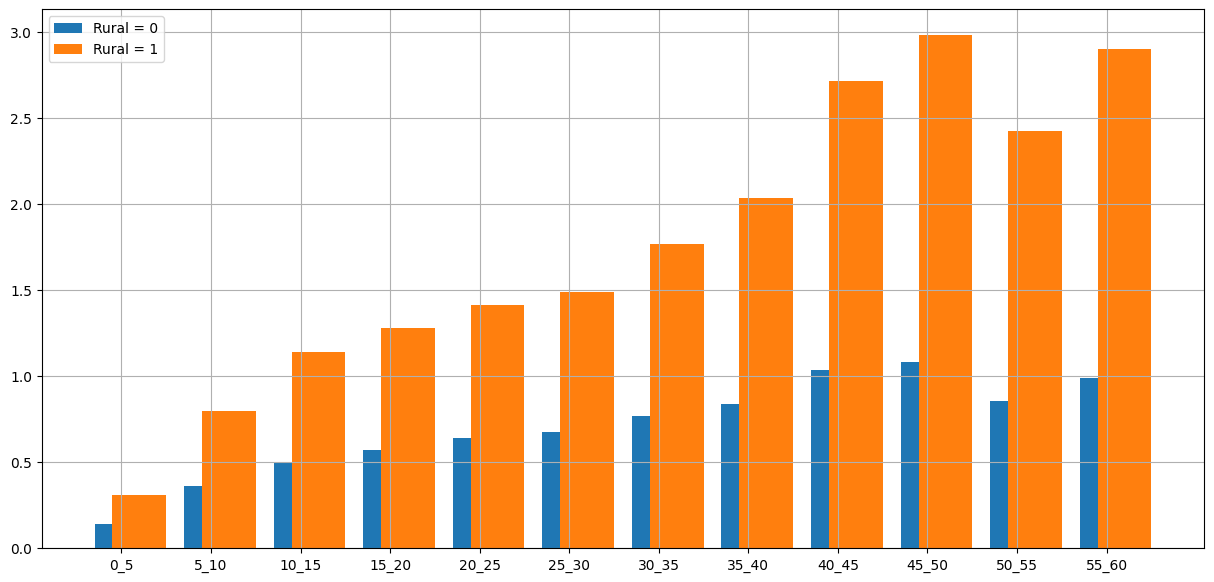

In [263]:
fig, ax = plt.subplots(figsize=(15,7))
for s in [0,1]:
    print(s)
    data = data_model[data_model.RURAL_RBD==s]
    val_list = []
    for x in [x for x in data_model.columns if ('EXPERIENCE_' in x)]:
        val_list += [data[data[x] == 1].probs.mean()]    
    
    
    plt.bar([x + s/5 for x in range(1,13)],[100*x for x in val_list], width=0.6, label='Rural = ' + str(s))

plt.legend()
plt.grid(True)
plt.xticks(range(1,13),[str(x)[11:] for x in data_model.columns if ('EXPERIENCE_' in x)])
plt.show()

0
1


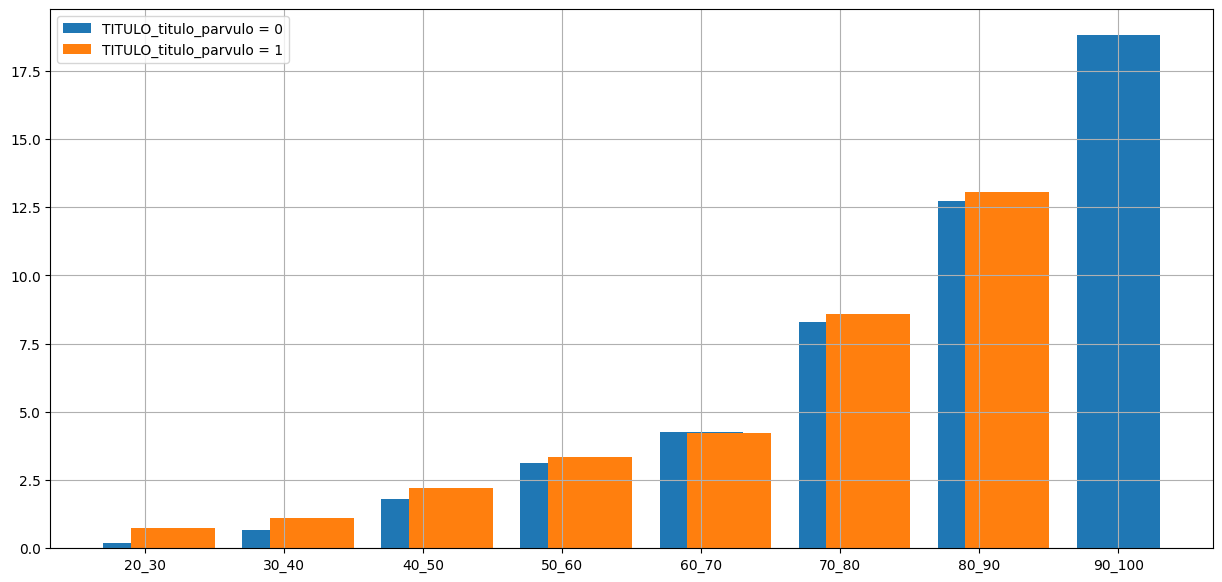

In [140]:
fig, ax = plt.subplots(figsize=(15,7))
for s in [0,1]:
    print(s)
    data = data_model[data_model.TITULO_titulo_parvulo==s]
    val_list = []
    for x in [x for x in data_model.columns if ('EDAD_' in x)]:
        val_list += [data[data[x] == 1].probs.mean()]    
    
    
    plt.bar([x + s/5 for x in range(1,9)],[100*x for x in val_list], width=0.6, label='TITULO_titulo_parvulo = ' + str(s))

plt.legend()
plt.grid(True)
plt.xticks(range(1,9),[str(x)[5:] for x in data_model.columns if ('EDAD_' in x)])
plt.show()